In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error # mean_squared_error: Evaluates regression performance.
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
# Load the dataset
housing = fetch_california_housing()
X = housing.data  # Features (e.g., median income, rooms, etc.)
y = housing.target  # Target (median house value)


In [3]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Convert data to DMatrix format
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)


In [5]:
# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',  # Root mean squared error
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}
'''
objective: Specifies the task as regression (reg:squarederror).
eval_metric: Evaluates the model using RMSE.
'''


'\nobjective: Specifies the task as regression (reg:squarederror).\neval_metric: Evaluates the model using RMSE.\n'

In [6]:
# Train the model
model = xgb.train(params, train_data, num_boost_round=100)


/home/mr-arthor/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:55:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


KeyboardInterrupt: 

In [7]:
# Predict on test data
y_pred = model.predict(test_data)


## RMSE (Root Mean Squared Error): Measures the average prediction error in the same units as the target.

In [8]:
# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Regression RMSE: {rmse:.2f}")


Regression RMSE: 0.54


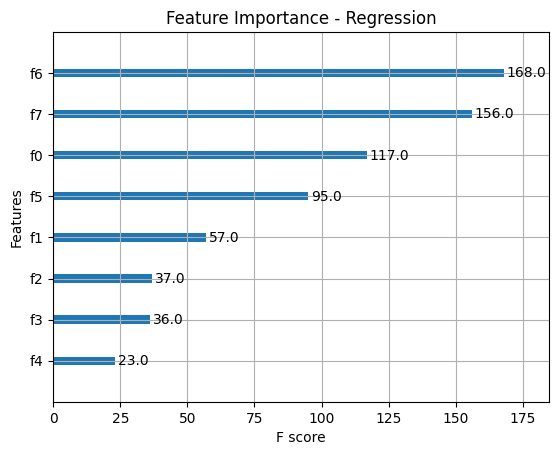

ImportError: You must install graphviz to plot tree

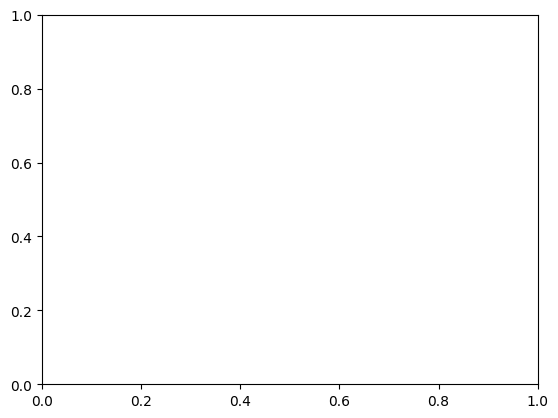

In [9]:
# Plot feature importance
xgb.plot_importance(model)
plt.title("Feature Importance - Regression")
plt.show()

# Plot tree structure
xgb.plot_tree(model, num_trees=0)
plt.rcParams['figure.figsize'] = [10, 7]
plt.title("Tree Structure - Regression (Tree 0)")
plt.show()
